# Unsupervised Learning 

*Author: Eda AYDIN*

## Table of Contents

- [Unsupervised Learning](#unsupervised-learning)
- [K-Means Clustering](#k-means-clustering)
- [Determining the number of optimum clusters](#determining-the-number-of-optimum-clusters)
- [Final K-Means Model](#final-k-means-model)
- [Hierarchical Cluster Analysis](#hierarchical-cluster-analysis)
- [Determining Cluster Number](#determining-cluster-number)
- [Final Model with AgglomerativeClustering](#final-model-with-agglomerativeclustering)
- [Principal Component Analysis](#principal-component-analysis)
- [Number of Component Analysis](#number-of-optimum-component)
- [Creation of Final PCA](#creation-of-final-pca)
- [Principal Component Regression Model](#principal-component-regression-model)
- [Visualization of Principal Component Analysis](#visualization-of-principal-component-analysis)

## Unsupervised Learning

If there is no dependent variable (Y) in the data set of the problem of interest, in other words, if there is no label, these problems are called **Unsupervised Learning**.

- K Ortalamalar (K-Means)
- Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis)
- Temel Bileşen Analizi (Principal Component Analysis)

## K-Means Clustering

***Amaç:*** Gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.

**Adımlar:** 

1. Küme sayısı belirlenir.
2. Rastgele k merkez seçilir. Seçilen merkezler, gözlem noktalarıdır. Bunlar merkez olarak kabul edilir.
3. Her gözlem için k merkezlere uzaklıklar hesaplanır.
4. Her gözlem en yakın olduğu merkeze yani kümeye atanır.
5. Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır. (Merkezler olması gereken yerde olup olmadığının kontrolü yapılır.)
6. Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümeleme yapısı nihai kümelenme olarak seçilir.


***Bu gözlemlerin hangi kümeye ait olacağı nasıl seçilmeli?***
- Küme için gözlemler arasında homojenlik olması gerekir.
- İki farklı kümede yer alan gözlemlerin arasında heterojenlik olması gerekir.

***Merkez sayısı kaç seçilmelidir?***
- Bu K-Means kümelemenin bir dezavantajıdır. Rastgele seçilmesi de bu yüzdendir.
- Bunu bizim hesaplayarak en optimum küme sayısını bulmamız gerekmektedir.


----

***Purpose:*** To separate the observations into clusters according to their similarity to each other.

**Steps:**

1. The number of clusters is determined.
2. Random k centers are selected. Selected centers are observation points. These are considered centers.
3. Distances to k centers are calculated for each observation.
4. Each observation is assigned to the closest center, namely the cluster.
5. For the clusters formed after the assignment operations, center calculations are made again. (The centers are checked to see if they are where they should be.)
6. This process is repeated for a determined number of iterations and the clustering structure of the observations in which the total within-cluster variation is minimum is selected as the final clustering.


***How ​​to choose which cluster these observations belong to?***
- For the cluster, there must be homogeneity between the observations.
- There must be heterogeneity between the observations in two different clusters.

***How ​​many centers should be selected?***
- This is a disadvantage of K-Means clustering. That's why it's randomly chosen.
- We need to find the optimum number of clusters by calculating this ourselves.


In [1]:
%pip install yellowbrick --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("datasets/USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe().T

# Aykırı değerleri incelediğimizde, çeyrekliklerden anlayacağımız gibi çok da anormal bir durum olmadığı gözükebiliyor.
# When we examine the outlier values, we can see that there is no abnormal situation as we will understand from the quarter.

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [8]:
# Uzaklık temelli ve gradient descent temelli yöntemlerin kullanımındaki süreçlerde, değişkenlerin standartlaştırılması önem arz ediyor.  
sc = MinMaxScaler(feature_range=(0,1))

In [9]:
df = sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [10]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)

In [11]:
kmeans.get_params()

"""_summary_
n_clusters : int, default=8
    The number of clusters to form as well as the number of centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

    'random': choose n_clusters observations (rows) at random from data for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

n_init : int, default=10
    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : int, default=300
    Maximum number of iterations of the k-means algorithm for a single run.

tol : float, default=1e-4
    Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

verbose : int, default=0
    Verbosity mode.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary <random_state>.

copy_x : bool, default=True
    When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.

algorithm : {"auto", "full", "elkan"}, default="auto"
    K-means algorithm to use. The classical EM-style algorithm is "full". The "elkan" variation is more efficient on data with well-defined clusters, by using the triangle inequality. However it's more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

    For now "auto" (kept for backward compatibility) chooses "elkan" but it might change in the future for a better heuristic.
"""

'_summary_\nn_clusters : int, default=8\n    The number of clusters to form as well as the number of centroids to generate.\n\ninit : {\'k-means++\', \'random\'}, callable or array-like of shape (n_clusters, n_features), default=\'k-means++\'\n    Method for initialization:\n\n    \'k-means++\' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.\n\n    \'random\': choose n_clusters observations (rows) at random from data for the initial centroids.\n\n    If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.\n\n    If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.\n\nn_init : int, default=10\n    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.\n\nmax_iter : int, default=

In [12]:
kmeans.n_clusters

4

In [13]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [14]:
kmeans.labels_
# 4 tane etiket var. 

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [15]:
kmeans.inertia_
# Sum of squared distances of samples to their closest cluster center

3.683456153585913

## Determining the number of optimum clusters

In [16]:
kmeans = KMeans()
sum_of_squared_distance = []
number_of_clusters = range(1,30)

In [17]:
for k in number_of_clusters:
    kmeans = KMeans(n_clusters=k).fit(df)
    sum_of_squared_distance.append(kmeans.inertia_)

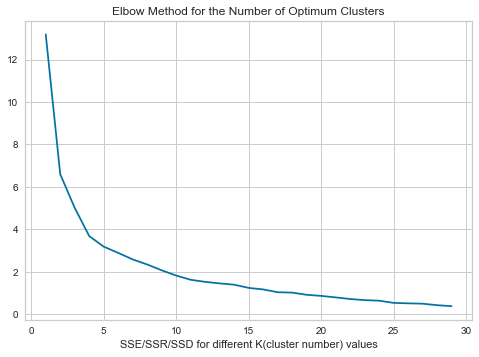

In [18]:
plt.plot(number_of_clusters, sum_of_squared_distance, "bx-")
plt.xlabel("SSE/SSR/SSD for different K(cluster number) values")
plt.title("Elbow Method for the Number of Optimum Clusters")
plt.savefig("Elbow Method for the Number of Optimum Clusters.png")
plt.show()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

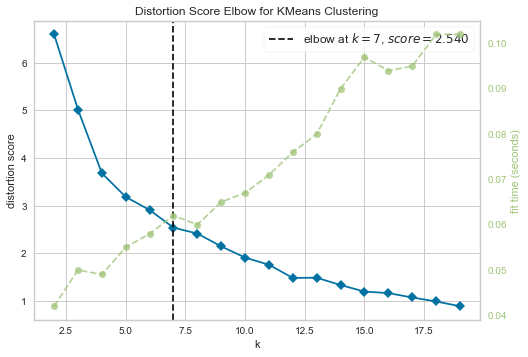

In [19]:
kmeans = KMeans()
elbow = KElbowVisualizer(estimator=kmeans,
                         k = (2,20))
elbow.fit(df)
elbow.show(outpath="Distortion Score Elbow for KMeans Clustering.png")

In [20]:
elbow.elbow_value_

7

## Final K-Means Model

In [21]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [22]:
kmeans.n_clusters

7

In [23]:
kmeans.cluster_centers_

array([[0.36626506, 0.31335616, 0.48474576, 0.31085271],
       [0.84337349, 0.60273973, 0.48728814, 0.43217054],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.54337349, 0.6130137 , 0.78305085, 0.42945736],
       [0.60374833, 0.78348554, 0.71751412, 0.75222509],
       [0.8253012 , 0.84474886, 0.23163842, 0.29112834],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072]])

In [24]:
kmeans.labels_

array([1, 4, 4, 0, 4, 4, 6, 3, 4, 1, 6, 2, 3, 0, 2, 0, 0, 1, 2, 4, 6, 4,
       2, 5, 3, 0, 0, 4, 2, 6, 4, 3, 5, 2, 6, 0, 0, 6, 6, 5, 2, 1, 3, 6,
       2, 0, 6, 2, 2, 0])

In [25]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [26]:
cluster_kmeans = kmeans.labels_

In [27]:
df = pd.read_csv("datasets/USArrests.csv",index_col=0)

In [28]:
df["cluster"] = cluster_kmeans
df["cluster"] += 1
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,5


In [29]:
df[df["cluster"]==5]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,5
California,9.0,276,91,40.6,5
Colorado,7.9,204,78,38.7,5
Florida,15.4,335,80,31.9,5
Maryland,11.3,300,67,27.8,5
Michigan,12.1,255,74,35.1,5
Nevada,12.2,252,81,46.0,5
New Mexico,11.4,285,70,32.1,5


In [30]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           10   6.880000    6.7      10  136.500000  133.0       10   
2            4  14.800000   14.3       4  221.000000  223.5        4   
3           10   2.680000    2.4      10   70.100000   64.5       10   
4            5   9.820000   10.4       5  224.000000  238.0        5   
5            9  10.822222   11.3       9  273.777778  276.0        9   
6            3  14.500000   14.4       3  291.666667  279.0        3   
7            9   4.955556    4.4       9  125.444444  120.0        9   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        60.600000   62.5    10  19.330000  18.75  
2        60.750000   59.5     4  24.025000  24.00  
3        51.000000   52.5    10  10.910000  11.00  
4        78.200000   80.0     5  23.920000  25.50  
5        74.333333   78.0     9  36.411111  35.10  
6        45.666667   45.0     3  18.566667  17.10  
7        80.111111   80.0     9  17.788889  18.80

In [31]:
df.to_csv("clusters.csv")

## Hierarchical Cluster Analysis

**Amaç:** Gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır.

![hierarchical-cluster-analysis](hierarcical_cluster_analysis.png)

- Agglomerative (Birleştirici) : İlk önce tüm veriler bir küme haline getirilir yani N tane eleman varsa N tane küme oluşur. Daha sonra birbirine mesafe olarak yakın olan kümeler birleşerek yeni bir küme oluşturur. Bu durum sistem kararlı oluncaya kadar devam eder.
- Divise(Bölümleyici) : Agglomerative’ in tam tersidir. İlk başta tüm veriler tek bir küme oluşturulur. Daha sonra bu küme parçalanarak kümeleme işlemi yapılır.

--- 

**Purpose:** To separate the observations into subsets according to their similarity to each other.

- Agglomerative: First, all data is made into a cluster, that is, if there are N elements, N clusters are formed. Then, clusters that are close to each other in distance merge to form a new cluster. This situation continues until the system is stable.
- Divise: It is the opposite of Agglomerative. At first all data is created in a single cluster. Then, this cluster is fragmented and clustering is performed.


In [32]:
df = pd.read_csv("datasets/USArrests.csv",index_col=0)

In [33]:
sc = MinMaxScaler(feature_range=(0,1))
df = sc.fit_transform(df)

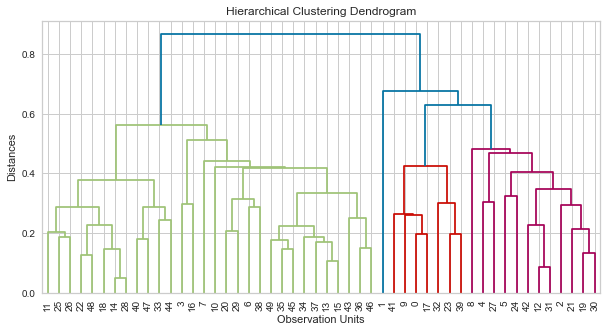

In [34]:
# Perform hierarchical/agglomerative clustering.
hc_average = linkage(y=df,method="average")

plt.figure(figsize=(10,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")

# Plot the hierarchical clustering as a dendrogram.
dendrogram(Z=hc_average, leaf_font_size=10)

"""_summary_
Z : ndarray
    The linkage matrix encoding the hierarchical clustering to render as a dendrogram. See the linkage function for more information on the format of Z.
p : int, optional
    The p parameter for truncate_mode.
truncate_mode : str, optional
    The dendrogram can be hard to read when the original observation matrix from which the linkage is derived is large. Truncation is used to condense the dendrogram. There are several modes:

    None
      No truncation is performed (default).
      Note: 'none' is an alias for None that's kept for backward compatibility.

    'lastp'
      The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows
      Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.

    'level'
      No more than p levels of the dendrogram tree are displayed. A "level" includes all nodes with p merges from the final merge.

      Note: 'mtica' is an alias for 'level' that's kept for backward compatibility.

color_threshold : double, optional
    For brevity, let t be the color_threshold. Colors all the descendent links below a cluster node k the same color if k is the first node below the cut threshold t. All links connecting nodes with distances greater than or equal to the threshold are colored with de default matplotlib color 'C0'. If t is less than or equal to zero, all nodes are colored 'C0'. If color_threshold is None or 'default', corresponding with MATLAB(TM) behavior, the threshold is set to
    0.7*max(Z[:,2]).

get_leaves : bool, optional
    Includes a list R['leaves']=H in the result dictionary. For each i, H[i] == j, cluster node j appears in position i in the left-to-right traversal of the leaves, where j < 2n-1 and i < n.
orientation : str, optional
    The direction to plot the dendrogram, which can be any of the following strings:

    'top'
      Plots the root at the top, and plot descendent links going downwards. (default).

    'bottom'
      Plots the root at the bottom, and plot descendent links going upwards.

    'left'
      Plots the root at the left, and plot descendent links going right.

    'right'
      Plots the root at the right, and plot descendent links going left.

labels : ndarray, optional
    By default, labels is None so the index of the original observation is used to label the leaf nodes. Otherwise, this is an n-sized sequence, with n == Z.shape[0] + 1. The labels[i] value is the text to put under the i th leaf node only if it corresponds to an original observation and not a non-singleton cluster.
count_sort : str or bool, optional
    For each node n, the order (visually, from left-to-right) n's two descendent links are plotted is determined by this parameter, which can be any of the following values:

    False
      Nothing is done.

    'ascending' or True
      The child with the minimum number of original objects in its cluster is plotted first.

    'descending'
      The child with the maximum number of original objects in its cluster is plotted first.

    Note, distance_sort and count_sort cannot both be True.
distance_sort : str or bool, optional
    For each node n, the order (visually, from left-to-right) n's two descendent links are plotted is determined by this parameter, which can be any of the following values:

    False
      Nothing is done.

    'ascending' or True
      The child with the minimum distance between its direct descendents is plotted first.

    'descending'
      The child with the maximum distance between its direct descendents is plotted first.

    Note distance_sort and count_sort cannot both be True.
show_leaf_counts : bool, optional
     When True, leaf nodes representing k>1 original observation are labeled with the number of observations they contain in parentheses.
no_plot : bool, optional
    When True, the final rendering is not performed. This is useful if only the data structures computed for the rendering are needed or if matplotlib is not available.
no_labels : bool, optional
    When True, no labels appear next to the leaf nodes in the rendering of the dendrogram.
leaf_rotation : double, optional
    Specifies the angle (in degrees) to rotate the leaf labels. When unspecified, the rotation is based on the number of nodes in the dendrogram (default is 0).
leaf_font_size : int, optional
    Specifies the font size (in points) of the leaf labels. When unspecified, the size based on the number of nodes in the dendrogram.
leaf_label_func : lambda or function, optional
    When leaf_label_func is a callable function, for each leaf with cluster index k < 2n-1. The function is expected to return a string with the label for the leaf.

    Indices k < n correspond to original observations while indices k \geq n correspond to non-singleton clusters.

    For example, to label singletons with their node id and non-singletons with their id, count, and inconsistency coefficient, simply do:
"""

plt.savefig("Hierarchical Clustering Dendrogram (1).png")
plt.show()

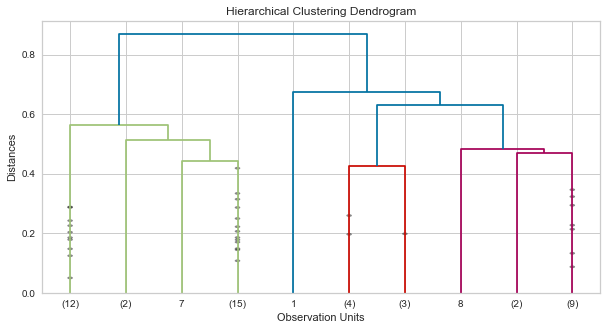

In [35]:
plt.figure(figsize=(10,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")

dendrogram(Z= hc_average,
           truncate_mode="lastp", 
           p=10, 
           show_contracted=True,
           leaf_font_size=10) 

"""_dendrogram_summary_
- Z : The linkage matrix encoding the hierarchical clustering to render as a dendrogram.
- truncate_mode : The dendrogram can be hard to read when the original observation matrix from which the linkage is derived is large. Truncation is used to condense the dendrogram.  
    - "lastp": The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage
    - "level": No more than p levels of the dendrogram tree are displayed. A “level” includes all nodes with p merges from the final merge.
- p : The p parameter for truncate_mode.
- show_contracted : When True the heights of non-singleton nodes contracted into a leaf node are plotted as crosses along the link connecting that leaf node. This really is only useful when truncation is used (see truncate_mode parameter)
- leaf_font_size : Specifies the font size (in points) of the leaf labels. 
"""

plt.savefig("Hierarchical Clustering Dendrogram (2).png")
plt.show()

## Determining Cluster Number

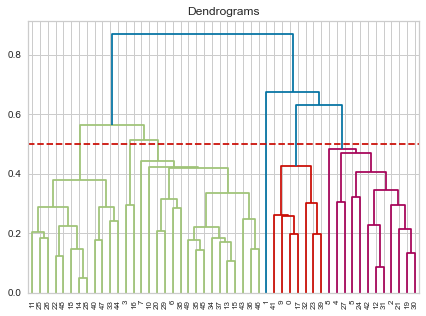

In [36]:
plt.figure(figsize=(7,5))
plt.title("Dendrograms")
dendrogram_results = dendrogram(Z= hc_average,)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.savefig("Determining Cluster Number with Dendrogram Results.png")
plt.show()

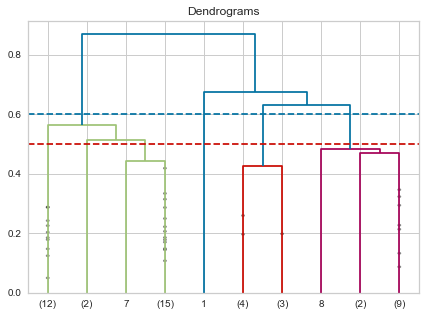

In [37]:
plt.figure(figsize=(7,5))
plt.title("Dendrograms")
dendrogram_results = dendrogram(Z= hc_average,
           truncate_mode="lastp", 
           p=10, 
           show_contracted=True,
           leaf_font_size=10) 
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.savefig("Determining Cluster Number with Dendrogram Results by using Truncate Mode.png")
plt.show()

## Final Model with AgglomerativeClustering

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage="average")
clusters = cluster.fit_predict(df)

In [39]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)
df["hi_cluster_no"] = clusters
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [40]:
df["kmeans_cluster_no"] = cluster_kmeans
df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

## Principal Component Analysis

- Temel fikri, çok değişkenli verinin ana özelliklerini daha az sayıda değişken / bileşen ile temsil etmektir.
- Diğer bir ifade ile: küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.
- Kısaca, elimizde 10 değişken bunu 3'e düşürmeyi hedefleyen bir analizdir.
- Veri kaybını göze alarak, küçük bir boyuta indirgeme yaklaşımıdır.

***Neden temel bileşen analizine ihtiyaç duyulur?***
- Çoklu doğrusal regresyon probleminden kurtulma ihtiyacı
- Yüz tanıma probleminde resimlere filtre yapma ihtiyacı
- Bir gürültü azaltma amacı
- Herhangi bir sebepten dolayı boyut indirgeme amacı

![Principal Component Analysis](pca.png)

- Temel bileşen analizi, veri setini bağımsız değişkenlerin doğrusal kombinasyonları ile ifade edilen bileşenlere indirger. Dolayısıyla, bu bileşenler arasında korelasyon yoktur.

----

- Its basic idea is to represent the main features of multivariate data with fewer variables/components.
- In other words: it is to reduce the variable size by risking a small amount of information loss.
- In short, we have an analysis of 10 variables aimed at reducing this to 3.
- It is an approach to reduce data to a small size, taking into account the loss of data.

***Why is principal component analysis needed?***
- The need to get rid of the multiple linear regression problem
- The need to filter pictures in face recognition problem
- A noise reduction purpose
- Size reduction purpose for any reason


Principal component analysis reduces the data set to components expressed by linear combinations of independent variables. Therefore, there is no correlation between these components.

In [41]:
df = pd.read_csv("datasets/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [42]:
numerical_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [43]:
df[numerical_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [44]:
df = df[numerical_cols]
df.dropna(inplace=True)
df.shape

(322, 16)

In [45]:
df = StandardScaler().fit_transform(df)

In [46]:
pca = PCA()
pca_fit = pca.fit_transform(df)

In [47]:
# Bileşenlerin başarısını bileşenlerin açıkladığı varyans oranlarına göre belirlenir.

pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

## Number of Optimum Component

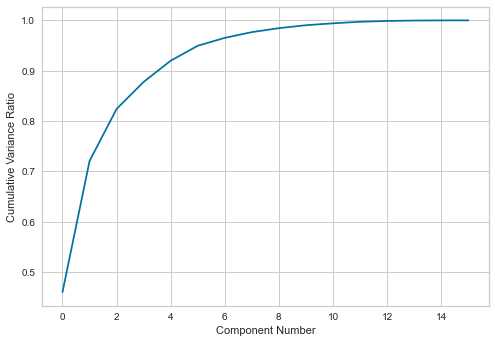

In [49]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component Number")
plt.ylabel("Cumulative Variance Ratio")
plt.savefig("Number of Optimum Component.png")
plt.show()

## Creation of Final PCA

In [50]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [51]:
pca.explained_variance_ratio_
# İlk bileşen bu verinin %46'sını açıklıyor.
# İkinci bileşen bu verinin %26'sını açıklıyor.
# Üçüncü bileşen bu verinin %10'unu açıklıyor.

array([0.46037855, 0.26039849, 0.1033886 ])

In [52]:
np.cumsum(pca.explained_variance_ratio_)
# Toplam varyansın 1 olduğunu düşünürsek, üçüncü bileşen ele alındığında, verinin %82'lik kısmını karşıladığını görürüz. Bu durumda veri kaybını göe aldığımız kısım burasıdır. %18'lik kısım kaybettiğimiz veridir.

array([0.46037855, 0.72077704, 0.82416565])

## Principal Component Regression Model

- Temel Bileşen analizi yöntemi ile sayısal veriler indirgenir ardından bu veri ve diğer türdeki veriler kullanılarak, bunların üzerine regresyon modeli inşa edilir. 

---

- With the Principal Component analysis method, numerical data is reduced and then a regression model is built on them by using this data and other types of data.

In [53]:
df = pd.read_csv("datasets/hitters.csv")
df.shape

(322, 20)

In [54]:
len(pca_fit)

322

In [55]:
numerical_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(numerical_cols)

16

In [56]:
other_columns = [col for col in df.columns if col not in numerical_cols]

In [57]:
pd.DataFrame(data=pca_fit,
             columns=["PC1","PC2","PC3"]).head()

# 16 sayısal değişkeni 3 tane sayısal değişkene indirgedik.

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [58]:
df[other_columns].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [59]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]), df[other_columns]], axis=1)
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [61]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [62]:
for col in ["NewLeague","Division","League"]:
    label_encoder(final_df, col)

In [63]:
final_df.dropna(inplace=True)

In [64]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [65]:
lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
y.mean()

535.9258821292775

In [66]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

In [67]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}


In [68]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [69]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [70]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))


## Visualization of Principal Component Analysis

In [71]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [72]:
df = pd.read_csv("datasets/breast_cancer.csv")

In [73]:
y = df["diagnosis"]
X = df.drop(["diagnosis","id"],axis=1)

In [74]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

In [75]:
pca_df = create_pca_df(X,y)

In [76]:
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [77]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.savefig("{} Graph After PCA.png".format(target.capitalize()))
    plt.show()

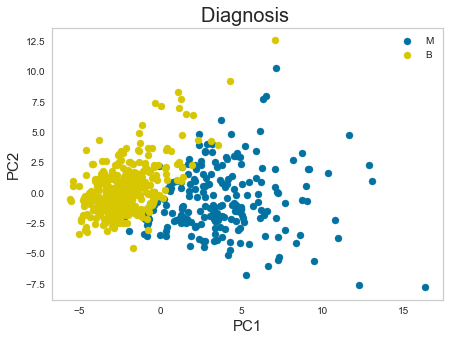

In [78]:
plot_pca(pca_df, "diagnosis")

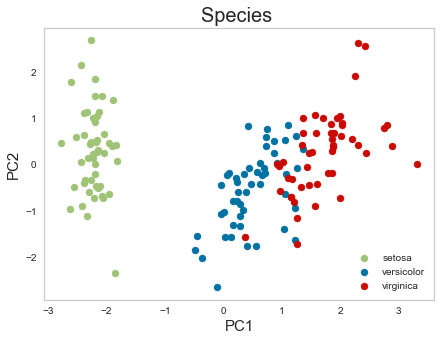

In [79]:
# Iris

import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")

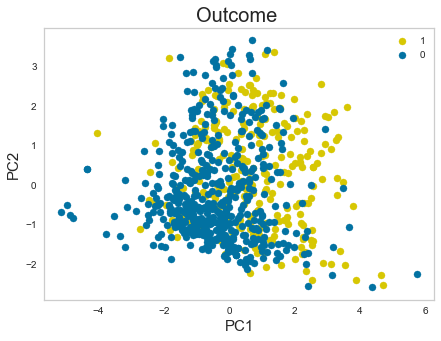

In [80]:
# Diabetes
df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")
